# Dealing with Missing Values

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


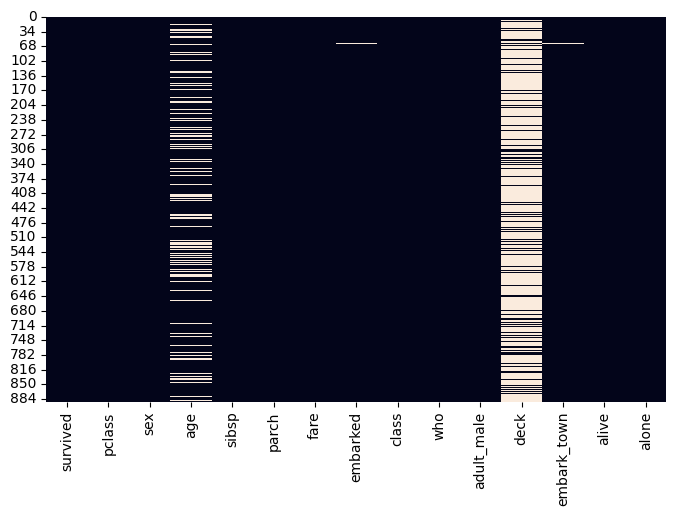

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load titanic dataset
data = sns.load_dataset('titanic')

# Visualize the data
plt.figure(figsize=(8, 5))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [4]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    str     
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    str     
 8   class        891 non-null    category
 9   who          891 non-null    str     
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    str     
 13  alive        891 non-null    str     
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), str(5)
memory usage: 80.7 KB


In [5]:
data.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [6]:
round(data.isnull().sum() / len(data) * 100, 2).sort_values(ascending=False)

deck           77.22
age            19.87
embarked        0.22
embark_town     0.22
sex             0.00
pclass          0.00
survived        0.00
fare            0.00
parch           0.00
sibsp           0.00
class           0.00
adult_male      0.00
who             0.00
alive           0.00
alone           0.00
dtype: float64

In [7]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
# load titanic dataset
data = sns.load_dataset('titanic')

# calculate missing values
print("----------------------------------------")
print(f"Missing values in each column:\n{data.isnull().sum().sort_values(ascending=False)}")
print("----------------------------------------")
print(f"Percentage of missing values in each column:\n{round(data.isnull().sum() / len(data) * 100, 2).sort_values(ascending=False)}")

----------------------------------------
Missing values in each column:
deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64
----------------------------------------
Percentage of missing values in each column:
deck           77.22
age            19.87
embarked        0.22
embark_town     0.22
sex             0.00
pclass          0.00
survived        0.00
fare            0.00
parch           0.00
sibsp           0.00
class           0.00
adult_male      0.00
who             0.00
alive           0.00
alone           0.00
dtype: float64


In [8]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
round(data['age'].mean(), 2)

np.float64(29.7)

In [10]:
data['age'].median()

np.float64(28.0)

In [11]:
# Mean of age to fill age missing values
data['age'] = data['age'].fillna(data['age'].median())

In [12]:
# drop deck column
data.drop('deck', axis=1, inplace=True)

In [13]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [14]:
data['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [15]:
# replacing embarked missing values with mode
data['embark_town'] = data['embark_town'].fillna(data['embark_town'].mode()[0])
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])

In [16]:
data.isnull().sum().sort_values(ascending=False)


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


# we can also impute using sk learn

In [17]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.impute import SimpleImputer

In [18]:
df = sns.load_dataset('titanic')

In [19]:
# impute age column using simpleimputer from sklearn
imputer = SimpleImputer(strategy='mean')
df['age'] = imputer.fit_transform(df[['age']])

In [20]:
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
age              0
survived         0
pclass           0
sex              0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [21]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# multivariate imputation

In [22]:
df = sns.load_dataset('titanic')

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# impute age column using iterativeimputer from sklearn
imputer = IterativeImputer(max_iter=20, n_nearest_features=5)
df['age'] = imputer.fit_transform(df[['age']])

In [25]:
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
age              0
survived         0
pclass           0
sex              0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

# farward fill and backward fill

In [26]:
df = sns.load_dataset('titanic')

In [27]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [28]:
# using forward fill impute age column
df['age'] = df['age'].bfill()

# using KNN imputer

In [29]:
from sklearn.impute import KNNImputer

# impute age column using KNNImputer from sklearn
imputer = KNNImputer(n_neighbors=5)
df['age'] = imputer.fit_transform(df[['age']])

In [30]:
# drop rows having missing values
df.dropna(inplace=True)

In [31]:
df.info()

<class 'pandas.DataFrame'>
Index: 201 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     201 non-null    int64   
 1   pclass       201 non-null    int64   
 2   sex          201 non-null    str     
 3   age          201 non-null    float64 
 4   sibsp        201 non-null    int64   
 5   parch        201 non-null    int64   
 6   fare         201 non-null    float64 
 7   embarked     201 non-null    str     
 8   class        201 non-null    category
 9   who          201 non-null    str     
 10  adult_male   201 non-null    bool    
 11  deck         201 non-null    category
 12  embark_town  201 non-null    str     
 13  alive        201 non-null    str     
 14  alone        201 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), str(5)
memory usage: 20.1 KB


In [32]:
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64